In this notebook we make the figure with all the target spectra


In [3]:
import time
import os.path
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn import preprocessing
import seaborn as sns
from datetime import timedelta
import glob
import scipy as sc

import sys, errno


In [5]:

palette = sns.color_palette()
#plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 12
BIGGER_SIZE = 13
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

savefigs_path = 'C:/Users/murield/OneDrive - SINTEF/PhD-APN/Chapters/AFKABAN'
one_col = 85 *0.0393701
two_col = 170*0.0393701

In [6]:
# -- USER-DETERMINED PARAMETERS -----------------------------------------------
letter_drive = 'F'
ppath = f'{letter_drive}:/AFKABAN/Pcod_190123/select/'
p2path = f'{letter_drive}:/AFKABAN/Pcod2_240123/select/'
apath = f'{letter_drive}:/AFKABAN/Acod_200123/select/'
pbpath = f'{letter_drive}:/AFKABAN/Pandalus_260123/select/'


In [8]:
a_tilt_df = pd.read_feather(f'{apath}/a_tilt_df.feather')
p_tilt_df = pd.read_feather(f'{ppath}/p_tilt_df.feather')
p2_tilt_df = pd.read_feather(f'{p2path}/p2_tilt_df.feather')
pb_tilt_df = pd.read_feather(f'{pbpath}/pb_tilt_df.feather')


# Find relevant frequencies

## Plot

Text(0.5, 0, '                          Frequency (kHz)')

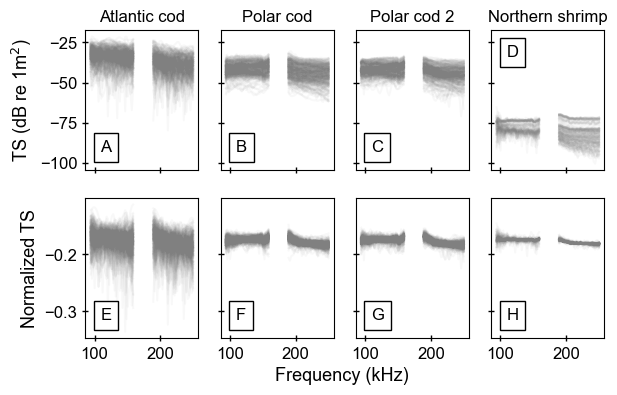

In [9]:
df_list = [a_tilt_df,p_tilt_df,p2_tilt_df,pb_tilt_df]
name_list = ['Atlantic cod', 'Polar cod', 'Polar cod 2', 'Northern shrimp']
fig,ax = plt.subplots(2,4, figsize=(two_col,4), sharex=True, sharey='row')
c_list=[1,2,0,3]

# Record number of entries for each species with first value as 0
N_120 = np.zeros(len(df_list)+1)
N_200 = np.zeros(len(df_list)+1)

for i_df in range(len(df_list)):
    # calculate median tilt for intervals of 10 degrees tilt
    df = df_list[i_df]

    #plot 120
    ind_120 = np.where(np.isnan(df['201.129']))[0]

    ts_s1 = np.where(df.columns.values=='94.032')[0][0]
    ts_e1 = np.where(df.columns.values=='158.548')[0][0]

    df_ts_120 = df.iloc[ind_120,ts_s1:ts_e1+1]

    # Normalizer
    mm_norm = preprocessing.Normalizer(norm='l2')
    df_norm_120 = mm_norm.fit_transform(df_ts_120)
    df_norm_120 = pd.DataFrame(df_norm_120)

    if i_df == 0:
        df_ts_120_all = df_ts_120
        df_norm_120_all = df_norm_120
    else:
        df_ts_120_all = pd.concat([df_ts_120_all, df_ts_120], ignore_index=True)
        df_norm_120_all = pd.concat([df_norm_120_all, df_norm_120], ignore_index=True)

    N_120[i_df+1] = len(df_ts_120)

    freqs_120 = df_ts_120.columns.unique().values.astype(np.float64)
    # Plot three TS
    ax[0, i_df].plot(freqs_120, df_ts_120.T, c = 'grey', alpha=0.05)
    ax[1, i_df].plot(freqs_120, df_norm_120.T, c = 'grey', alpha=0.05)


    # plot 200
    ind_200 = np.where(np.isnan(df['120.242']))[0]

    ts_s2 = np.where(df.columns.values=='189.032')[0][0]
    ts_e2 = np.where(df.columns.values=='249.516')[0][0]

    df_ts_200 = df.iloc[ind_200,ts_s2:ts_e2+1]

    # Normalizer
    mm_norm = preprocessing.Normalizer(norm='l2')
    df_norm_200 = mm_norm.fit_transform(df_ts_200)
    df_norm_200 = pd.DataFrame(df_norm_200)

    if i_df == 0:
        df_ts_200_all = df_ts_200
        df_norm_200_all = df_norm_200
    else:
        df_ts_200_all = pd.concat([df_ts_200_all, df_ts_200], ignore_index=True)
        df_norm_200_all = pd.concat([df_norm_200_all, df_norm_200], ignore_index=True)


    N_200[i_df+1] = len(df_ts_200)

    freqs_200 = df_ts_200.columns.unique().values.astype(np.float64)
    ax[0, i_df].plot(freqs_200, df_ts_200.T, c = 'grey', alpha=0.05)
    ax[1, i_df].plot(freqs_200,df_norm_200.T, c = 'grey', alpha=0.05)

    ax[0, i_df].set_title(name_list[i_df])

letter =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', ]
axes = ax.flatten()
for panel_i in range(len(letter)):
    if panel_i == 3:
        at = AnchoredText(letter[panel_i], loc='upper left')
        axes[panel_i].add_artist(at)
    else:
        at = AnchoredText(letter[panel_i], loc='lower left')
        axes[panel_i].add_artist(at)

ax[0,0].set_ylabel('TS (dB re 1m$^2$)')
ax[1,0].set_ylabel('Normalized TS')
ax[1,1].set_xlabel('                          Frequency (kHz)')
    #axes[i_df].legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
    


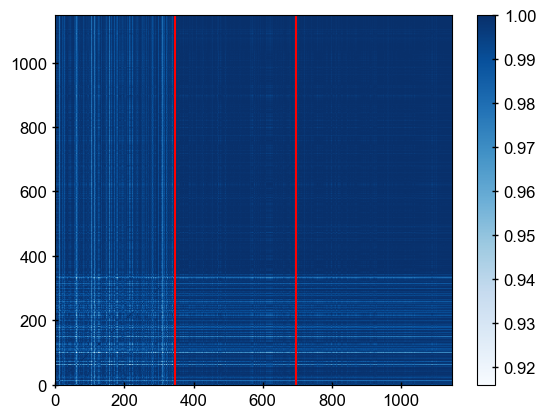

In [10]:
C = cosine_similarity(df_norm_120_all)
f = plt.pcolormesh(C, cmap=plt.get_cmap('Blues'))
plt.colorbar(f)
plt.axvline(x=N_120[1], c='r')
plt.axvline(x=N_120[2]+N_120[3], c='r')

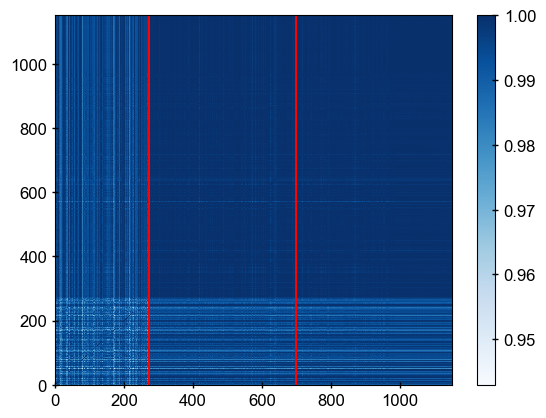

In [11]:
C = cosine_similarity(df_norm_200_all)
f = plt.pcolormesh(C, cmap=plt.get_cmap('Blues'))
plt.colorbar(f)
plt.axvline(x=N_200[1], c='r')
plt.axvline(x=N_200[2]+N_200[3], c='r')

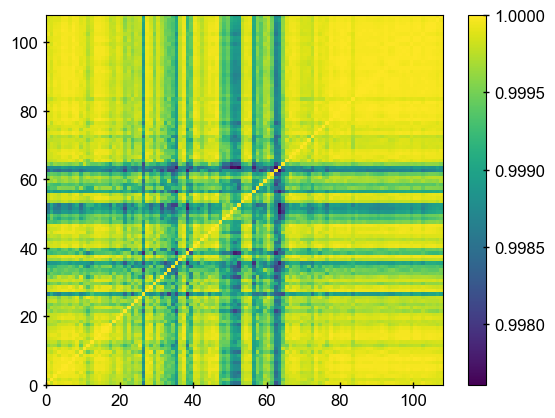

### number of SED in tracks for each bandwidth

In [7]:
for panel_i in range(0,4):
    df = df_list[panel_i]
    species = name_list[panel_i]

    ts_s = np.where(df.columns.values=='98.065')[0][0]
    ts_e = np.where(df.columns.values=='191.048')[0][0]
    
    n_120 = np.sum(~np.isnan(df.iloc[:,ts_s]))
    n_200 = np.sum(~np.isnan(df.iloc[:,ts_e]))
    
    n_tracks = len(df.Region_name.unique())
    
    print(f'{species}: There are {n_120} SED in the 120 kHz bandwidth and {n_200} SED in the 200 kHz bandwidth in {n_tracks} tracks')

Atlantic cod: There are 345 SED in the 120 kHz bandwidth and 273 SED in the 200 kHz bandwidth in 60 tracks
Polar cod: There are 345 SED in the 120 kHz bandwidth and 362 SED in the 200 kHz bandwidth in 62 tracks
Polar cod 2: There are 350 SED in the 120 kHz bandwidth and 337 SED in the 200 kHz bandwidth in 66 tracks
Northern shrimp: There are 108 SED in the 120 kHz bandwidth and 180 SED in the 200 kHz bandwidth in 25 tracks



### Mean intensity of each species.

In [8]:
for panel_i in range(0,4):
    df = df_list[panel_i]
    species = name_list[panel_i]

    ts_lows = np.where(df.columns.values=='94.032')[0][0]
    ts_lowe = np.where(df.columns.values=='160.565')[0][0]
    
    ts_highs = np.where(df.columns.values=='189.032')[0][0]
    ts_highe = np.where(df.columns.values=='251.532')[0][0]
    
    n_120 = np.sum(np.nanmean(df.iloc[:,ts_lows:ts_lowe]))
    n_200 = np.sum(np.nanmean(df.iloc[:,ts_highs:ts_highe]))
    
    print(f'{species}: There are {n_120:.2f} SED in the 120 kHz bandwidth and {n_200:.2f} SED in the 200 kHz bandwidth')

Atlantic cod: There are -33.83 SED in the 120 kHz bandwidth and -38.47 SED in the 200 kHz bandwidth
Polar cod: There are -41.46 SED in the 120 kHz bandwidth and -43.77 SED in the 200 kHz bandwidth
Polar cod 2: There are -41.75 SED in the 120 kHz bandwidth and -44.19 SED in the 200 kHz bandwidth
Northern shrimp: There are -77.56 SED in the 120 kHz bandwidth and -81.81 SED in the 200 kHz bandwidth


### Maximum TS range at each nominal frequency

In [28]:
df

,index,Ping_number,Target_range,Depth,Region_name,90.000,92.016,94.032,96.048,98.065,...,Angle_minor_axis,Angle_major_axis,TS_comp,z,x,y,off_axis_dist,off_axis_angle,tilt,alpha
0,46,12278,2.437943,2.435837,Region 10,NaN,NaN,-35.105095,-34.120641,-34.441514,...,-0.22445,2.371000,-43.398761,-2.435837,0.009542,-0.100857,0.101307,2.381576,NaN,-23.111149
1,47,12281,2.478770,2.472907,Region 10,NaN,NaN,NaN,NaN,NaN,...,1.20120,3.755100,-47.299923,-2.472907,-0.051852,-0.162304,0.170385,3.941499,-12.278341,-1.445533
2,48,12282,2.478770,2.478047,Region 10,NaN,NaN,-32.759212,-33.361819,-35.976894,...,1.00290,-0.953070,-44.801283,-2.478048,-0.043380,0.041224,0.059844,1.383394,3.491630,8.428793
3,49,12283,2.455440,2.450231,Region 10,NaN,NaN,NaN,NaN,NaN,...,1.57640,3.385600,-37.399875,-2.450230,-0.067431,-0.144953,0.159869,3.733066,-0.105263,-8.639318
4,50,12284,2.484602,2.482807,Region 10,NaN,NaN,-31.844360,-32.640808,-35.423245,...,1.47670,-1.601800,-46.166391,-2.482807,-0.064004,0.069429,0.094430,2.178104,1.605425,11.850168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,493,11031,6.398143,6.397362,Region 99,NaN,NaN,NaN,NaN,NaN,...,0.68934,0.571420,-39.615727,-6.397362,-0.076972,-0.063804,0.099978,0.895348,48.353247,84.072986
614,494,11033,6.345651,6.344810,Region 99,NaN,NaN,NaN,NaN,NaN,...,0.74293,0.564580,-37.464788,-6.344810,-0.082275,-0.062522,0.103336,0.933072,46.761984,9.450981
615,495,11034,6.333986,6.332906,Region 99,NaN,NaN,-30.572786,-28.219710,-29.810263,...,1.05820,-0.000023,-35.770422,-6.332906,-0.116976,0.000003,0.116976,1.058200,7.927395,6.403810
616,496,11035,6.322322,6.319155,Region 99,NaN,NaN,NaN,NaN,NaN,...,1.49960,1.020200,-47.937497,-6.319155,-0.165429,-0.112530,0.200074,1.813466,-0.922621,-8.249052


In [32]:
for panel_i in range(0,4):
    df = df_list[panel_i]
    species = name_list[panel_i]

    nom_120 = np.where(df.columns.values=='120.242')[0][0]
    
    nom_200 = np.where(df.columns.values=='201.129')[0][0]
    
    N_reg = len(df.Region_name.unique())
    range_120 = np.zeros(N_reg)
    range_200 = np.zeros(N_reg)
    for i in range(N_reg):
        df_reg = df[df['Region_name']==df.Region_name.unique()[i]]
    
        range_120[i] = np.max(df_reg.iloc[:,nom_120]) - np.min(df_reg.iloc[:,nom_120])
        range_200[i] = np.max(df_reg.iloc[:,nom_200]) - np.min(df_reg.iloc[:,nom_200])
    
    print(f'{species}: The max range is {np.nanmax(range_120):.2f} dB re 1m^2 at 120 kHz and {np.nanmax(range_200):.2f} dB re 1m^2 at 200 kHz.')
    
    #print(f'{species}: The mean range is {np.mean(range_120):.2f} dB re 1m^2 at 120 kHz and {np.nanmean(range_200):.2f} dB re 1m^2 at 200 kHz.')

Atlantic cod: The max range is 43.48 dB re 1m^2 at 120 kHz and 32.69 dB re 1m^2 at 200 kHz.
Polar cod: The max range is 16.80 dB re 1m^2 at 120 kHz and 19.78 dB re 1m^2 at 200 kHz.
Polar cod 2: The max range is 13.69 dB re 1m^2 at 120 kHz and 21.12 dB re 1m^2 at 200 kHz.
Northern shrimp: The max range is 7.22 dB re 1m^2 at 120 kHz and 8.55 dB re 1m^2 at 200 kHz.


# Total variation

In [49]:
for panel_i in range(0,4):
    df = df_list[panel_i]
    species = name_list[panel_i]
    
    ind_120 = np.where(np.isnan(df['201.129']))[0]
    ind_200 = np.where(np.isnan(df['120.242']))[0]

    ts_lows = np.where(df.columns.values=='94.032')[0][0]
    ts_lowe = np.where(df.columns.values=='158.548')[0][0]
    
    ts_highs = np.where(df.columns.values=='189.032')[0][0]
    ts_highe = np.where(df.columns.values=='249.516')[0][0]
    
    mm_norm = preprocessing.Normalizer(norm='l2')
    df_norm_120 = mm_norm.fit_transform(df.iloc[ind_120,ts_lows:ts_lowe])
    df_norm_200 = mm_norm.fit_transform(df.iloc[ind_200,ts_highs:ts_highe])                                         
    
    TV_120 = np.nansum(np.abs(np.diff(df.iloc[:,ts_lows:ts_lowe], axis=1)))
    TV_200 = np.nansum(np.abs(np.diff(df.iloc[:,ts_highs:ts_highe], axis=1)))
    
    TV_120_norm = np.nansum(np.abs(np.diff(df_norm_120, axis=1)))
    TV_200_norm = np.nansum(np.abs(np.diff(df_norm_200, axis=1)))
    
    #print(f'{species}: The mean TV is {np.nanmean(TV_120):.2f} at 120 kHz and {np.nanmean(TV_200):.2f} at 200 kHz.')
    print(f'{species}_normalized: The mean TV is {np.nanmean(TV_120_norm):.2f} normalized TS units at 120 kHz and {np.nanmean(TV_200_norm):.2f} at 200 kHz.')

Atlantic cod_normalized: The mean TV is 64.40 normalized TS units at 120 kHz and 61.26 at 200 kHz.
Polar cod_normalized: The mean TV is 19.64 normalized TS units at 120 kHz and 15.82 at 200 kHz.
Polar cod 2_normalized: The mean TV is 19.82 normalized TS units at 120 kHz and 14.70 at 200 kHz.
Northern shrimp_normalized: The mean TV is 7.92 normalized TS units at 120 kHz and 4.57 at 200 kHz.


In [44]:
np.where(df.columns.values=='120.242')[0][0]

20